In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [373]:
bc_data = pd.read_csv('project1.csv')

# Exploratory Data Analysis

First, we will check the size of the data set. 

In [374]:
bc_data.shape 

(386, 10)

The output tells us that there are 10 columns and 386 rows.

In [375]:
bc_data.info() #(p1.2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        386 non-null    object
 1   age          386 non-null    object
 2   menopause    386 non-null    object
 3   tumor-size   385 non-null    object
 4   inv-nodes    385 non-null    object
 5   node-caps    386 non-null    object
 6   deg-malig    386 non-null    int64 
 7   breast       386 non-null    object
 8   breast-quad  386 non-null    object
 9   irradiat     386 non-null    object
dtypes: int64(1), object(9)
memory usage: 30.3+ KB


From this output, we have one column "deg-malig" under the data type of int64.
Whereas all the other columns are classified as object 

In [376]:
bc_data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


Menopause, node-caps, breast, and breast quad can be converted into categorical
Age, tumor size, and inv-nodes have numbers but it is in ranges. These columns will need to be converted into categorical!

Now, let's check if there are any duplicated rows. (p1.2)

In [377]:
bc_data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
381    False
382    False
383    False
384    False
385    False
Length: 386, dtype: bool

In [378]:
bc_data.duplicated().sum()

11

In [379]:
bc_data.drop_duplicates(inplace=True, ignore_index=True)

In [380]:
bc_data.duplicated().sum()

0

Now that we have dropped any duplicated rows, we will check for null, missing, and invalid values!

In [381]:
bc_data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     1
inv-nodes      1
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

Uh oh! There are 2 null values. Let's replace these values with zeros as place holders since both columns have ranges as their values.

In [382]:
bc_data['tumor-size'].fillna(bc_data['tumor-size'].mode()[0], inplace=True)

/tmp/ipykernel_18662/3706940030.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bc_data['tumor-size'].fillna(bc_data['tumor-size'].mode()[0], inplace=True)


In [383]:
bc_data['inv-nodes'].fillna(bc_data['inv-nodes'].mode()[0], inplace=True)

/tmp/ipykernel_18662/1282921404.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bc_data['inv-nodes'].fillna(bc_data['inv-nodes'].mode()[0], inplace=True)


In [384]:
bc_data.isnull().sum()

class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
dtype: int64

Now we have replaced our null values, we must check if the other columns need cleaning up too!

In [385]:
print("age columns:", bc_data['age'].unique()) #6 unique values
print("tumor size columns:", bc_data['tumor-size'].unique()) #11 unique values
print("inverse nodes columns:", bc_data['inv-nodes'].unique()) #7 unique values
print("menopause columns:", bc_data['menopause'].unique()) #3 unique values
print("node caps columns:", bc_data['node-caps'].unique()) #4 unique values, but 2 values are invalid
print("breast columns:", bc_data['breast'].unique()) #2 unique values
print("breast quad columns:", bc_data['breast-quad'].unique()) #7 unique values, but 2 values are invalid
print("irradiat columns:", bc_data['irradiat'].unique()) #2 unique values
print("class columns:", bc_data['class'].unique()) #2 unique values

age columns: ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
tumor size columns: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inverse nodes columns: ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']
menopause columns: ['premeno' 'ge40' 'lt40']
node caps columns: ['no' '*' 'yes' '?']
breast columns: ['left' 'right']
breast quad columns: ['left_low' 'right_up' 'left_up' 'right_low' '?' 'central' '*']
irradiat columns: ['no' 'yes']
class columns: ['recurrence-events' 'no-recurrence-events']


Aw rats! Our node caps and our breast quad has some questionable values. Let's investigate them!


In [386]:
print(bc_data['node-caps'].value_counts(dropna=False))
print(bc_data['breast-quad'].value_counts(dropna=False))

node-caps
no     266
yes     97
*        6
?        6
Name: count, dtype: int64
breast-quad
left_low     137
left_up      118
right_up      48
right_low     47
central       19
?              4
*              2
Name: count, dtype: int64


Well, we know how frequently they happen, but let's dive a bit deeper and see if there are any patterns or correlations that will help me decide what to do with these values. We want to to make sure that we are remedying these values from the point of view of helping patients. So, if there is a correlation with the degree of malignancy, this can help us treat these values with reason.

In [387]:
print(bc_data[bc_data['node-caps']=='?'].describe())
print(bc_data[bc_data['node-caps']=='*'].describe())
print(bc_data[bc_data['breast-quad']=='?'].describe())
print(bc_data[bc_data['breast-quad']=='*'].describe())

       deg-malig
count    6.00000
mean     1.50000
std      0.83666
min      1.00000
25%      1.00000
50%      1.00000
75%      1.75000
max      3.00000
       deg-malig
count   6.000000
mean    2.000000
std     0.894427
min     1.000000
25%     1.250000
50%     2.000000
75%     2.750000
max     3.000000
       deg-malig
count    4.00000
mean     2.50000
std      0.57735
min      2.00000
25%      2.00000
50%      2.50000
75%      3.00000
max      3.00000
       deg-malig
count        2.0
mean         2.0
std          0.0
min          2.0
25%          2.0
50%          2.0
75%          2.0
max          2.0


Based on the analysis above:  

- `node-caps` `"?"` occurs with relatively low malignancy (1.5).  
- `node-caps` `"*"` occurs with medium malignancy (2.0).  
- `breast-quad` `"?"` occurs with more malignant cases (2.5).  
- `breast-quad` `"*"` occurs with medium malignant cases (2.0).  

Because of this, it may be safe to assume that these values were input as ambiguous or unknown testing results.  
To best remedy this, I will treat these values as missing (`NaN`) since there is no clear pattern.  

- For `node-caps`, I will impute with the mode (the most frequent value).  
- For `breast-quad`, I will create a new category labeled `"unknown"` to preserve information.  

In [388]:
bc_data['node-caps'].replace({'?': None, '*': None}, inplace=True)
bc_data['node-caps'].fillna(bc_data['node-caps'].mode()[0], inplace=True) # ChatGPT helped me debug this line for syntax

/tmp/ipykernel_18662/2781299995.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bc_data['node-caps'].replace({'?': None, '*': None}, inplace=True)
/tmp/ipykernel_18662/2781299995.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [389]:
bc_data['breast-quad'].replace({'?': 'unknown', '*': 'unknown'}, inplace=True) # ChatGPT helped me debug this line for syntax

/tmp/ipykernel_18662/1171401333.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bc_data['breast-quad'].replace({'?': 'unknown', '*': 'unknown'}, inplace=True) # ChatGPT helped me debug this line for syntax


In [390]:
print("node caps columns:", bc_data['node-caps'].unique()) 
print("breast quad columns:", bc_data['breast-quad'].unique())

node caps columns: ['no' 'yes']
breast quad columns: ['left_low' 'right_up' 'left_up' 'right_low' 'unknown' 'central']


In [391]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   class        375 non-null    object
 1   age          375 non-null    object
 2   menopause    375 non-null    object
 3   tumor-size   375 non-null    object
 4   inv-nodes    375 non-null    object
 5   node-caps    375 non-null    object
 6   deg-malig    375 non-null    int64 
 7   breast       375 non-null    object
 8   breast-quad  375 non-null    object
 9   irradiat     375 non-null    object
dtypes: int64(1), object(9)
memory usage: 29.4+ KB


Woo Hoo! We do not have any null or missing values! 

Now let's work on converting the data types for each of these columns.

Plan for Data Type Conversion

- `age`, `tumor-size`, and `inv-nodes`:  
  - Convert these columns into ordinal categories by mapping their ranges.
 
- `menopause`:  
  - The groupby function will be utilized because this column is dependent on the `age` column.

- `class`, `node-caps`, `breast`, and `irradiat`:  
  - Since these columns have two unique values, utilize binary one-hot encoding.

- `breast-quad`:  
  - One-hot encode the five valid locations.

Let's try it out! *(I asked ChatGPT if my plan seemed reasonable and I got validation!)*

As a reminder, here is what each column should look like for age, tumor size, and inverse nodes.

In [392]:
print("age columns:", bc_data['age'].unique()) #6 unique values
print("tumor size columns:", bc_data['tumor-size'].unique()) #11 unique values
print("inverse nodes columns:", bc_data['inv-nodes'].unique()) #7 unique values

age columns: ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']
tumor size columns: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']
inverse nodes columns: ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']


In [393]:
bc_data['age'] = bc_data['age'].str.strip()
bc_data['tumor-size'] = bc_data['tumor-size'].str.strip()
bc_data['inv-nodes'] = bc_data['inv-nodes'].str.strip()

bc_data['age'] = bc_data['age'].replace({' ': '', '-': '-'}, regex=True)
bc_data['tumor-size'] = bc_data['tumor-size'].replace({' ': '', '-': '-'}, regex=True)
bc_data['inv-nodes'] = bc_data['inv-nodes'].replace({' ': '', '-': '-'}, regex=True)

bc_data['age'] = bc_data['age'].astype(str)
bc_data['tumor-size'] = bc_data['tumor-size'].astype(str)
bc_data['inv-nodes'] = bc_data['inv-nodes'].astype(str)

age_map = {
    '20-29': 1, '30-39': 2, '40-49': 3, '50-59': 4, '60-69': 5, '70-79': 6, '80-89': 7, '90-99': 8
}

tumor_size_map = {
    '0-4': 1, '5-9': 2, '10-14': 3, '15-19': 4, '20-24': 5, 
    '25-29': 6, '30-34': 7, '35-39': 8, '40-44': 9, '45-49': 10, '50-54': 11
}

inv_nodes_map = {
    '0-2': 1, '3-5': 2, '6-8': 3, '9-11': 4, '12-14': 5, '15-17': 6, '18-20': 7, '21-23': 8, '24-26': 9
}

bc_data['age'] = bc_data['age'].map(age_map)
bc_data['tumor-size'] = bc_data['tumor-size'].map(tumor_size_map)
bc_data['inv-nodes'] = bc_data['inv-nodes'].map(inv_nodes_map)

In [394]:
print("Unique age values after mapping:", bc_data['age'].unique())
print("Unique tumor-size values after mapping:", bc_data['tumor-size'].unique())
print("Unique inv-nodes values after mapping:", bc_data['inv-nodes'].unique())

Unique age values after mapping: [2 3 5 4 6 1]
Unique tumor-size values after mapping: [ 7  5  4  1  6 11  3  9  8  2 10]
Unique inv-nodes values after mapping: [1 3 4 2 6 5 9]


Now for the menopause column!

In [395]:
print("menopause columns:", bc_data['menopause'].unique()) #3 unique values

menopause columns: ['premeno' 'ge40' 'lt40']


In [396]:
bc_data['menopause'] = bc_data['menopause'].fillna(bc_data.groupby('age')['menopause'].transform(lambda x: x.mode()[0] if not x.mode().empty else 'unknown'))

menopause_mapping = {'lt40': 1, 'ge40': 2, 'premeno': 3}
bc_data['menopause'] = bc_data['menopause'].map(menopause_mapping)

In [397]:
print("menopause columns:", bc_data['menopause'].unique()) #3 unique values

menopause columns: [3 2 1]


Now onto the breast, irradiat, class, and node caps columns!

In [398]:
print("breast columns:", bc_data['breast'].unique()) #2 unique values
print("irradiat columns:", bc_data['irradiat'].unique()) #2 unique values
print("class columns:", bc_data['class'].unique()) #2 unique values
print("node caps columns:", bc_data['node-caps'].unique()) #2 unique values

breast columns: ['left' 'right']
irradiat columns: ['no' 'yes']
class columns: ['recurrence-events' 'no-recurrence-events']
node caps columns: ['no' 'yes']


In [399]:
bc_data['breast'] = bc_data['breast'].astype("category")
bc_data['irradiat'] = bc_data['irradiat'].astype("category")
bc_data['class'] = bc_data['class'].astype("category")
bc_data['node-caps'] = bc_data['node-caps'].astype("category")

bc_data = pd.get_dummies(bc_data, columns=["breast", "irradiat", "class", "node-caps"], drop_first=True)

In [400]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      375 non-null    int64 
 1   menopause                375 non-null    int64 
 2   tumor-size               375 non-null    int64 
 3   inv-nodes                375 non-null    int64 
 4   deg-malig                375 non-null    int64 
 5   breast-quad              375 non-null    object
 6   breast_right             375 non-null    bool  
 7   irradiat_yes             375 non-null    bool  
 8   class_recurrence-events  375 non-null    bool  
 9   node-caps_yes            375 non-null    bool  
dtypes: bool(4), int64(5), object(1)
memory usage: 19.2+ KB


In [401]:
print("breast quad columns:", bc_data['breast-quad'].unique()) #6 unique values

breast quad columns: ['left_low' 'right_up' 'left_up' 'right_low' 'unknown' 'central']


In [402]:
bc_data['breast-quad'] = bc_data['breast-quad'].astype("category")

bc_data = pd.get_dummies(bc_data, columns=["breast-quad"])

In [403]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      375 non-null    int64
 1   menopause                375 non-null    int64
 2   tumor-size               375 non-null    int64
 3   inv-nodes                375 non-null    int64
 4   deg-malig                375 non-null    int64
 5   breast_right             375 non-null    bool 
 6   irradiat_yes             375 non-null    bool 
 7   class_recurrence-events  375 non-null    bool 
 8   node-caps_yes            375 non-null    bool 
 9   breast-quad_central      375 non-null    bool 
 10  breast-quad_left_low     375 non-null    bool 
 11  breast-quad_left_up      375 non-null    bool 
 12  breast-quad_right_low    375 non-null    bool 
 13  breast-quad_right_up     375 non-null    bool 
 14  breast-quad_unknown      375 non-null    bool 
dtypes: boo

# Univariate and Multivariate Analysis
Now that our data frame has been primed and processed, let's get to analyzing our data!

In [404]:
bc_data.describe()

,age,menopause,tumor-size,inv-nodes,deg-malig
count,375.000000,375.00000,375.000000,375.000000,375.000000
mean,3.733333,2.54400,5.562667,1.706667,2.074667
std,1.124988,0.53494,2.191548,1.162853,0.752730
min,1.000000,1.00000,1.000000,1.000000,1.000000
25%,3.000000,2.00000,4.000000,1.000000,2.000000
50%,4.000000,3.00000,6.000000,1.000000,2.000000
75%,5.000000,3.00000,7.000000,2.000000,3.000000
max,6.000000,3.00000,11.000000,9.000000,3.000000


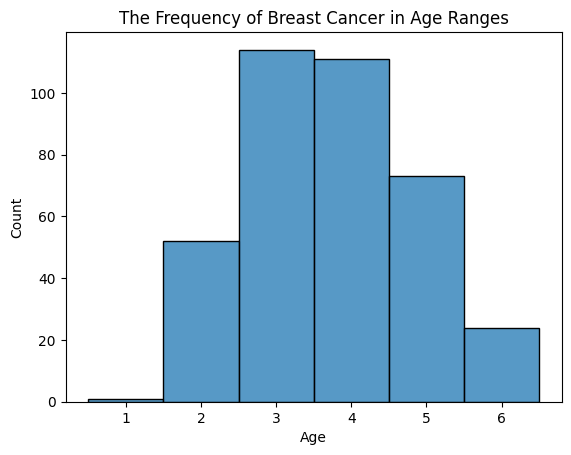

In [405]:
age_labels = {
    '20-29': 1, '30-39': 2, '40-49': 3, '50-59': 4,
    '60-69': 5, '70-79': 6, '80-89': 7, '90-99': 8
}

sns.histplot(bc_data['age'], bins=len(age_labels), discrete=True)

plt.xlabel("Age")
plt.title("The Frequency of Breast Cancer in Age Ranges")
plt.show()

Based on this graph, we can see that the 3rd (40-49) and 4th (50-59) ranges have the most cases of breast cancer.

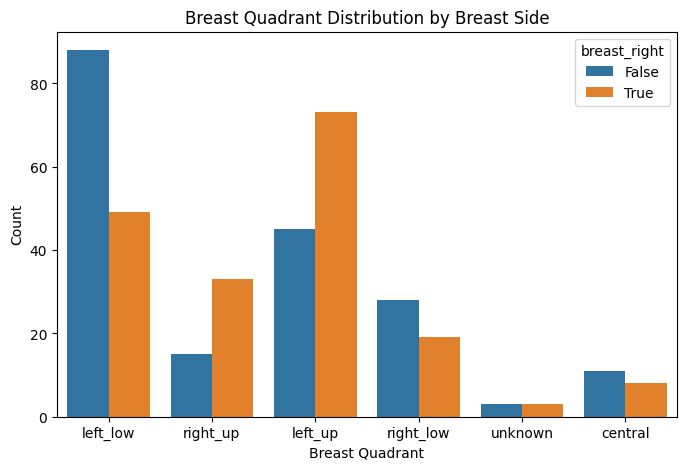

In [406]:
# Reverse One-Hot Encoding: Create a single 'breast-quad' column
quad_columns = [
    'breast-quad_central', 'breast-quad_left_low', 'breast-quad_left_up', 
    'breast-quad_right_low', 'breast-quad_right_up', 'breast-quad_unknown'
]

bc_data['breast-quad'] = bc_data[quad_columns].idxmax(axis=1)  
bc_data['breast-quad'] = bc_data['breast-quad'].str.replace('breast-quad_', '')  
plt.figure(figsize=(8, 5))
sns.countplot(x=bc_data['breast-quad'], hue=bc_data['breast_right'])
plt.xlabel("Breast Quadrant")
plt.ylabel("Count")
plt.title("Breast Quadrant Distribution by Breast Side")

plt.show()

Let's breakdown this graph! So in the legend, "False" means the left breast and "True" means the right breast. The x-axsis breaks down the quadrants of the breast that the tumor occurs. The plot shows that a lot of tumors are found in the left lower quadrant in the left breast in this data set.

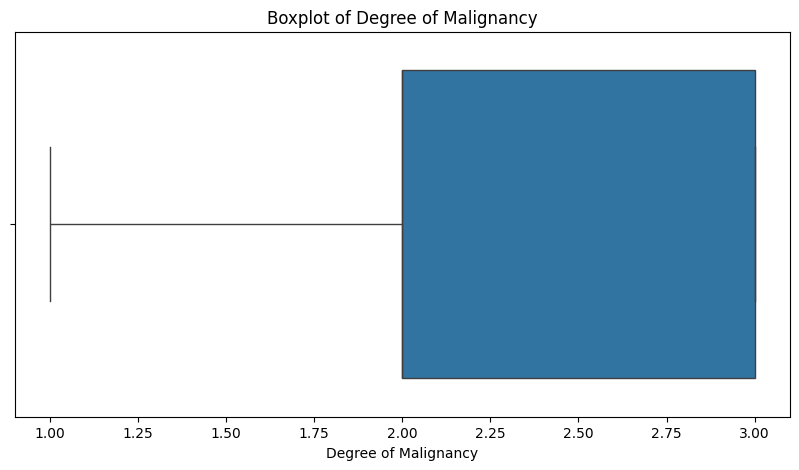

In [407]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=bc_data['deg-malig'])

plt.xlabel("Degree of Malignancy")
plt.title("Boxplot of Degree of Malignancy")
plt.show()

This box plot shows that the data is heavily skewed towards the higher malignancy.

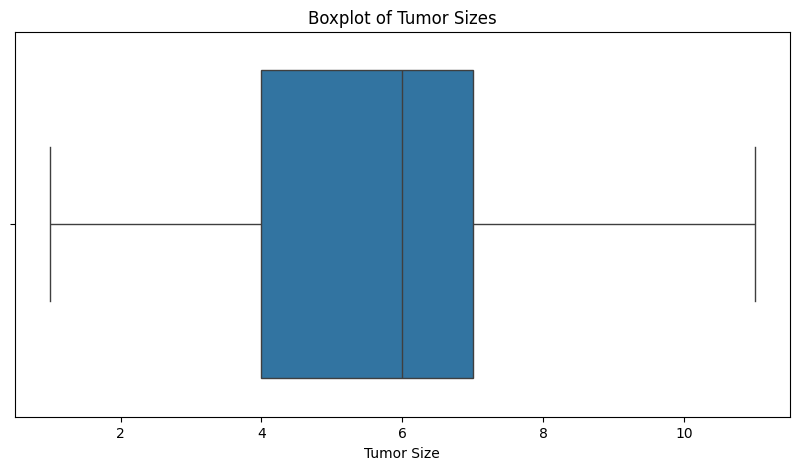

In [408]:
tumor_labels = {
    '0-4': 1, '5-9': 2, '10-14': 3, '15-19': 4, '20-24': 5, 
    '25-29': 6, '30-34': 7, '35-39': 8, '40-44': 9, '45-49': 10, '50-54': 11
}

plt.figure(figsize=(10, 5))
sns.boxplot(data=bc_data, x="tumor-size")

plt.xlabel("Tumor Size")
plt.title("Boxplot of Tumor Sizes")
plt.show()

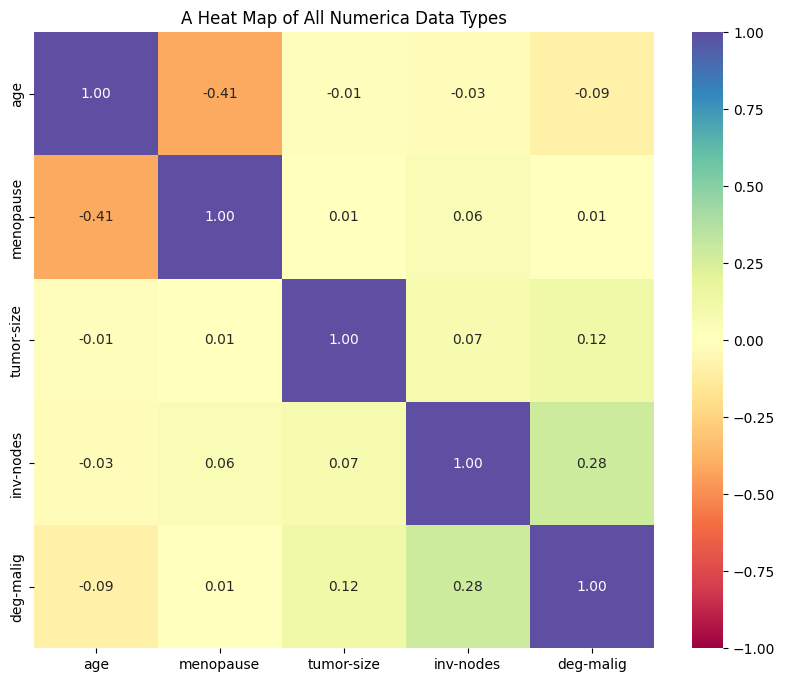

In [409]:
numeric_cols = bc_data.select_dtypes(include=["number"]).columns

plt.figure(figsize=(10, 8))
sns.heatmap(bc_data[numeric_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.title("A Heat Map of All Numerica Data Types")
plt.show()

In [410]:
bc_data.drop(['breast-quad'], axis=1, inplace=True) #deleting the object column that I made earlier

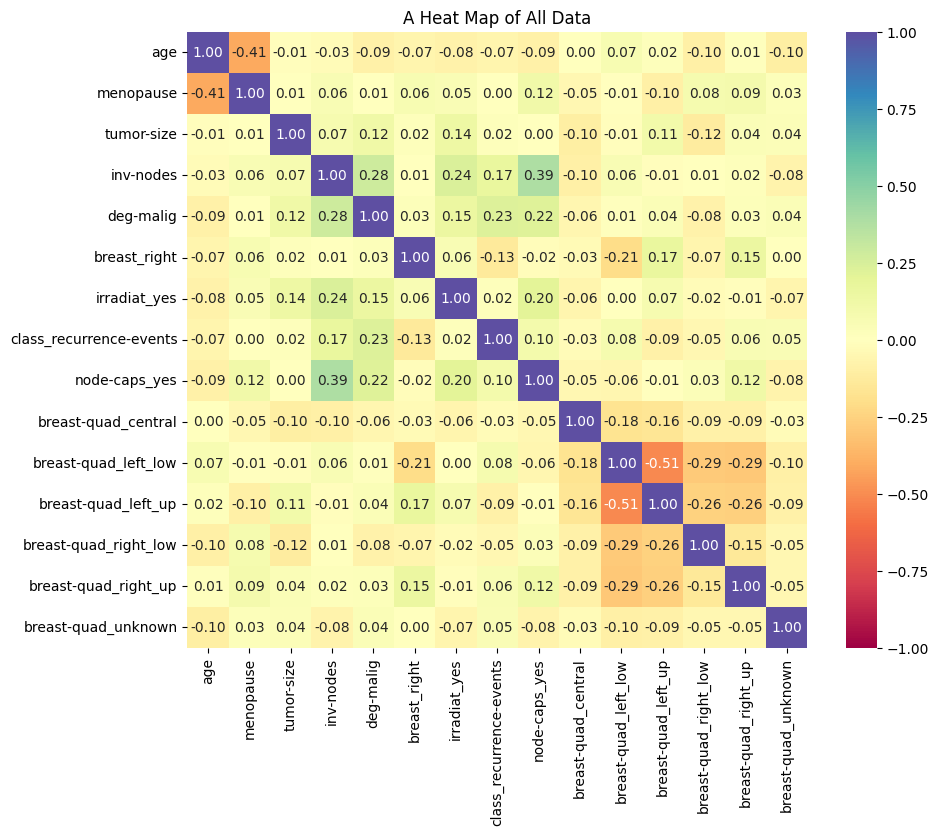

In [411]:
bc_data_cols = bc_data.columns

plt.figure(figsize=(10, 8))
sns.heatmap(bc_data[bc_data_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

plt.title("A Heat Map of All Data")
plt.show()

# Fit Classification Models

We primed our data, did some univariate and multivariate analysis, so now we are going to fit classification models to predict the recurrence class. First, we need to split the data into training and test datasets!

In [412]:
bc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   age                      375 non-null    int64
 1   menopause                375 non-null    int64
 2   tumor-size               375 non-null    int64
 3   inv-nodes                375 non-null    int64
 4   deg-malig                375 non-null    int64
 5   breast_right             375 non-null    bool 
 6   irradiat_yes             375 non-null    bool 
 7   class_recurrence-events  375 non-null    bool 
 8   node-caps_yes            375 non-null    bool 
 9   breast-quad_central      375 non-null    bool 
 10  breast-quad_left_low     375 non-null    bool 
 11  breast-quad_left_up      375 non-null    bool 
 12  breast-quad_right_low    375 non-null    bool 
 13  breast-quad_right_up     375 non-null    bool 
 14  breast-quad_unknown      375 non-null    bool 
dtypes: boo

In [413]:
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

X = bc_data.drop(columns=['class_recurrence-events']) 
y = bc_data['class_recurrence-events']  

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 300 samples
Test set size: 75 samples


In [414]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

KNN Accuracy: 0.59


In [415]:
param_grid = {'n_neighbors': range(1, 20)}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best K value: {best_k}")

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

y_pred_best_knn = best_knn.predict(X_test)
accuracy_best_knn = accuracy_score(y_test, y_pred_best_knn)
print(f"Best KNN Accuracy: {accuracy_best_knn:.2f}")

Best K value: 16
Best KNN Accuracy: 0.65


In [416]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Logistic Regression Accuracy: {accuracy_log:.2f}")

Logistic Regression Accuracy: 0.65


In [417]:
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))

print("Best KNN Classification Report (Grid Search CV):")
print(classification_report(y_test, y_pred_best_knn))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

KNN Classification Report:
              precision    recall  f1-score   support

       False       0.67      0.78      0.72        51
        True       0.27      0.17      0.21        24

    accuracy                           0.59        75
   macro avg       0.47      0.48      0.46        75
weighted avg       0.54      0.59      0.56        75

Best KNN Classification Report (Grid Search CV):
              precision    recall  f1-score   support

       False       0.67      0.96      0.79        51
        True       0.00      0.00      0.00        24

    accuracy                           0.65        75
   macro avg       0.34      0.48      0.40        75
weighted avg       0.46      0.65      0.54        75

Logistic Regression Classification Report:
              precision    recall  f1-score   support

       False       0.70      0.86      0.77        51
        True       0.42      0.21      0.28        24

    accuracy                           0.65        75
   macro 

Oh man... these classification reports do not look so good! But let's try to understand what is going on.

It seems that this model favors the majority class and has poor recal for recurrence cases. This makes sense since there is a class imbalence issue where there are more non recurrence (false) cases than recurrence (true) cases. 

It also looks like that the grid search may be over fitting. The KNN model is focusing only on the majority class, so it is ignoting the recurrence cases completely.

Lastly, the logistic regression has better results and can detect about 21% of the recurrence cases. While this is better than 0% from the KNN grid search, it is still not the best result!